In [1]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

df = pd.read_csv('ml_labelled_data.csv')


In [6]:
df.dtypes

Unnamed: 0                                       int64
Accident_Index                                  object
Accident_Severity                                int64
Carriageway_Hazards                              int64
Date                                            object
Day_of_Week                                      int64
Did_Police_Officer_Attend_Scene_of_Accident    float64
Junction_Detail                                  int64
Latitude                                       float64
Light_Conditions                                 int64
Longitude                                      float64
LSOA_of_Accident_Location                        int64
Number_of_Casualties                             int64
Number_of_Vehicles                               int64
Pedestrian_Crossing-Human_Control              float64
Pedestrian_Crossing-Physical_Facilities        float64
Police_Force                                     int64
Road_Surface_Conditions                          int64
Road_Type 

In [7]:
X = df.drop("Accident_Severity",axis=1)#Feature Matrix
y = df["Accident_Severity"] 

In [8]:
X.head()

,Unnamed: 0,Accident_Index,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Latitude,Light_Conditions,Longitude,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,0,200501BS00001,2,04-01-2005,5,1.0,4,51.489096,4,-0.191170,...,29,5,3,4,30,17:42,2,6,2005,0
1,1,200501BS00002,2,05-01-2005,6,1.0,0,51.520075,1,-0.211708,...,29,1,0,4,30,17:36,2,2,2005,0
2,2,200501BS00003,2,06-01-2005,4,1.0,4,51.525301,1,-0.206458,...,29,1,3,4,30,00:15,2,2,2005,0
3,3,200501BS00004,2,07-01-2005,0,1.0,4,51.482442,4,-0.173862,...,29,1,3,4,30,10:35,2,2,2005,0
4,4,200501BS00005,2,10-01-2005,1,1.0,4,51.495752,0,-0.156618,...,29,5,3,4,30,21:13,2,2,2005,0


In [9]:
X.corr()

,Unnamed: 0,Carriageway_Hazards,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Latitude,Light_Conditions,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
Unnamed: 0,1.000000,-0.001226,0.000597,-0.001795,0.001985,-0.044129,0.017124,-0.014519,0.101066,-0.001171,...,0.005346,-0.010135,0.003357,0.001774,0.004740,0.011960,-0.039243,0.020250,0.984773,0.015949
Carriageway_Hazards,-0.001226,1.000000,0.001051,0.001859,-0.002349,0.006642,0.005660,-0.004625,0.005822,0.007174,...,0.003849,0.000111,0.004904,-0.032301,0.024391,0.005813,0.005426,0.007446,-0.002255,0.007289
Day_of_Week,0.000597,0.001051,1.000000,0.012000,0.007866,-0.008789,0.028207,0.006798,-0.007004,-0.018635,...,0.000678,0.000603,0.004184,0.003727,0.006382,-0.008072,0.006624,-0.000410,0.001316,-0.004794
Did_Police_Officer_Attend_Scene_of_Accident,-0.001795,0.001859,0.012000,1.000000,0.034170,-0.011849,0.037796,0.003283,-0.069511,-0.109047,...,0.007998,0.002613,-0.087448,0.038008,-0.004055,-0.161769,0.134765,0.047895,0.000452,-0.017822
Junction_Detail,0.001985,-0.002349,0.007866,0.034170,1.000000,-0.023451,0.008790,0.041530,-0.031748,-0.039673,...,-0.070202,0.005569,-0.027831,0.086051,-0.007121,-0.114189,0.083524,-0.013475,0.006742,-0.030774
Latitude,-0.044129,0.006642,-0.008789,-0.011849,-0.023451,1.000000,-0.000575,-0.405038,0.178533,0.033793,...,0.003162,0.086172,0.074643,0.003062,0.010507,0.035722,-0.044467,0.032153,-0.038337,0.633769
Light_Conditions,0.017124,0.005660,0.028207,0.037796,0.008790,-0.000575,1.000000,-0.029819,0.068649,-0.015422,...,-0.054171,-0.027485,-0.156011,0.020471,0.006290,0.098537,-0.114434,-0.105597,0.007835,0.005654
Longitude,-0.014519,-0.004625,0.006798,0.003283,0.041530,-0.405038,-0.029819,1.000000,-0.288862,-0.039019,...,0.049169,0.094996,-0.074736,-0.006579,-0.003363,-0.055265,0.086454,-0.047850,0.040056,-0.409649
LSOA_of_Accident_Location,0.101066,0.005822,-0.007004,-0.069511,-0.031748,0.178533,0.068649,-0.288862,1.000000,0.040812,...,-0.119944,0.054479,0.085872,0.003823,0.012991,0.306844,-0.394221,0.046076,-0.029316,0.390822
Number_of_Casualties,-0.001171,0.007174,-0.018635,-0.109047,-0.039673,0.033793,-0.015422,-0.039019,0.040812,1.000000,...,-0.025633,0.005976,0.043387,-0.045933,0.009381,0.136949,-0.116009,0.005201,-0.004314,-0.016267


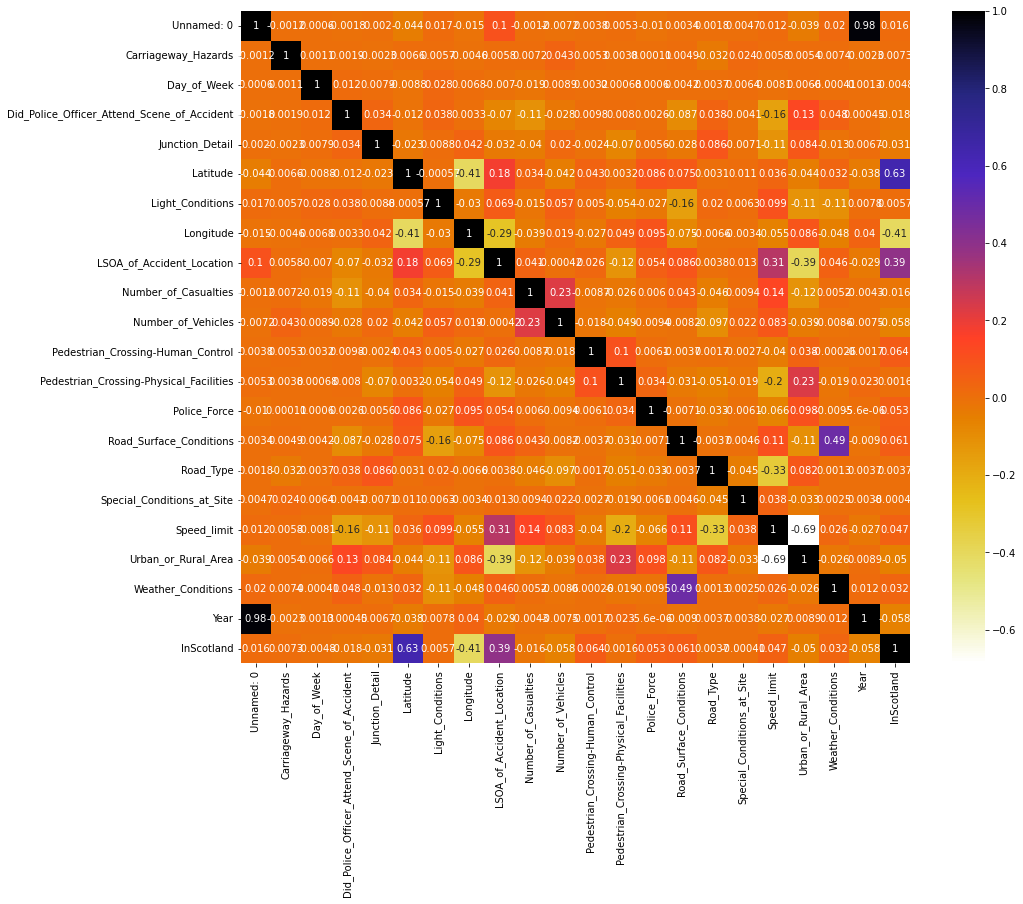

In [10]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(15,12))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [11]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [12]:
corr_features = correlation(X, 0.7)
len(set(corr_features))

3

In [13]:
corr_features

{'InScotland', 'Urban_or_Rural_Area', 'Year'}

In [14]:
X=X.drop(corr_features,axis=1)



# importing libraries

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import log_loss

# Logistic Regression

In [4]:
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
accident_ml = df.drop('Accident_Severity' ,axis=1)
accident_ml = accident_ml[['Day_of_Week' , 'Weather_Conditions' , 'Road_Surface_Conditions'
                          , 'Light_Conditions','Speed_limit','Junction_Detail','Road_Type']]

accident_ml.head()

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(accident_ml.values, 
                                              df['Accident_Severity'].values,test_size=0.20, random_state=99)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
# Fit the model on the trainng data.
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

C:\Users\polis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\polis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\polis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

Accuracy 85.49
              precision    recall  f1-score   support

           0   0.000000  0.000000  0.000000      2867
           1   0.000000  0.000000  0.000000     27560
           2   0.854913  1.000000  0.921782    179288

    accuracy                       0.854913    209715
   macro avg   0.284971  0.333333  0.307261    209715
weighted avg   0.730876  0.854913  0.788043    209715



Predicted,2,All
Actual,,
0,2867,2867
1,27560,27560
2,179288,179288
All,209715,209715


# naive bayes

In [17]:
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
accident_ml = df.drop('Accident_Severity' ,axis=1)
accident_ml = accident_ml[['Day_of_Week' , 'Weather_Conditions' , 'Road_Surface_Conditions'
                          , 'Light_Conditions','Speed_limit','Junction_Detail','Road_Type']]

accident_ml.head()

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(accident_ml.values, 
                                              df['Accident_Severity'].values,test_size=0.20, random_state=99)


In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
clf = GaussianNB()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=prediction)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

C:\Users\polis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\polis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy 85.49
              precision    recall  f1-score   support

           0   0.000000  0.000000  0.000000      2867
           1   0.000000  0.000000  0.000000     27560
           2   0.854913  1.000000  0.921782    179288

    accuracy                       0.854913    209715
   macro avg   0.284971  0.333333  0.307261    209715
weighted avg   0.730876  0.854913  0.788043    209715



C:\Users\polis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predicted,2,All
Actual,,
0,2867,2867
1,27560,27560
2,179288,179288
All,209715,209715


# Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree1 = round(decision_tree.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
### Confusion Matrix 
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 85.1
              precision    recall  f1-score   support

           0   0.015625  0.000698  0.001336      2867
           1   0.120868  0.004245  0.008202     27560
           2   0.854879  0.994735  0.919519    179288

    accuracy                       0.850979    209715
   macro avg   0.330457  0.333226  0.309686    209715
weighted avg   0.746944  0.850979  0.787205    209715



Predicted,0,1,2,All
Actual,,,,
0,2,12,2853,2867
1,21,117,27422,27560
2,105,839,178344,179288
All,128,968,208619,209715


# KNN

In [5]:
X_train.shape

(838860, 7)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=915)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=915)

In [7]:
y_pred = neigh.predict(X_test)

In [8]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

prediction = neigh.predict(X_test)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=prediction)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

C:\Users\polis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\polis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\polis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy 85.49
              precision    recall  f1-score   support

           0   0.000000  0.000000  0.000000      2867
           1   0.000000  0.000000  0.000000     27560
           2   0.854913  1.000000  0.921782    179288

    accuracy                       0.854913    209715
   macro avg   0.284971  0.333333  0.307261    209715
weighted avg   0.730876  0.854913  0.788043    209715



Predicted,2,All
Actual,,
0,2867,2867
1,27560,27560
2,179288,179288
All,209715,209715


# Random Forest

In [5]:
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)
acc_random_forest1 = round(random_forest.score(X_test, y_test) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 85.32
              precision    recall  f1-score   support

           0   0.000000  0.000000  0.000000      2867
           1   0.108959  0.001633  0.003217     27560
           2   0.854871  0.997758  0.920804    179288

    accuracy                       0.853210    209715
   macro avg   0.321277  0.333130  0.308007    209715
weighted avg   0.745159  0.853210  0.787630    209715



Predicted,0,1,2,All
Actual,,,,
0,0,7,2860,2867
1,6,45,27509,27560
2,41,361,178886,179288
All,47,413,209255,209715
